In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [30]:
original_image = plt.imread("Fractured Spine 746x976.tif")
original_image = cv2.resize(original_image, (512, 512))

In [31]:
def convert_to_grey(image):
    grey_image = image.copy()
    if(len(image.shape) == 3):
        grey_image = np.mean(image, axis=2).astype(np.uint8)
    return grey_image

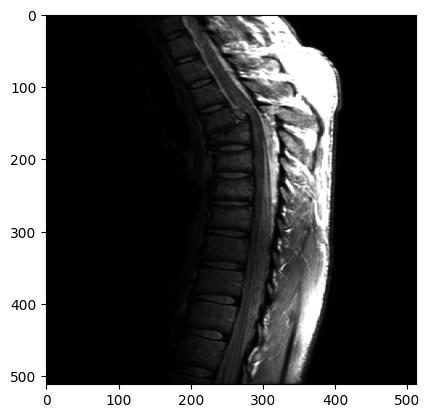

In [32]:
plt.imshow(original_image, cmap='gray')

In [33]:
grey_image = convert_to_grey(original_image)

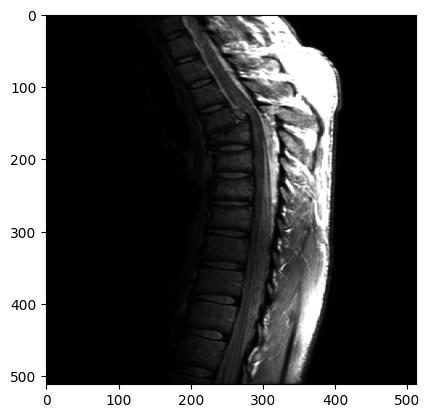

In [34]:
plt.imshow(grey_image, cmap='gray')

In [35]:
def power_law(image, gamma):
    f_range = np.arange(0,256)
    f_value = np.power(f_range, gamma)
    transformed_image = image.copy()
    height, width = transformed_image.shape
    for i in range(height):
        for j in range(width):
            pixel = transformed_image[i][j] / 255.0
            transformed_image[i][j] = (pixel**gamma) * 255
    return transformed_image, f_range, f_value

In [36]:
gamma = 0.4
power_law_transofrmed_image, f_range, f_value = power_law(grey_image, gamma)

Text(0.5, 1.0, 'Power Law, gamma 0.4')

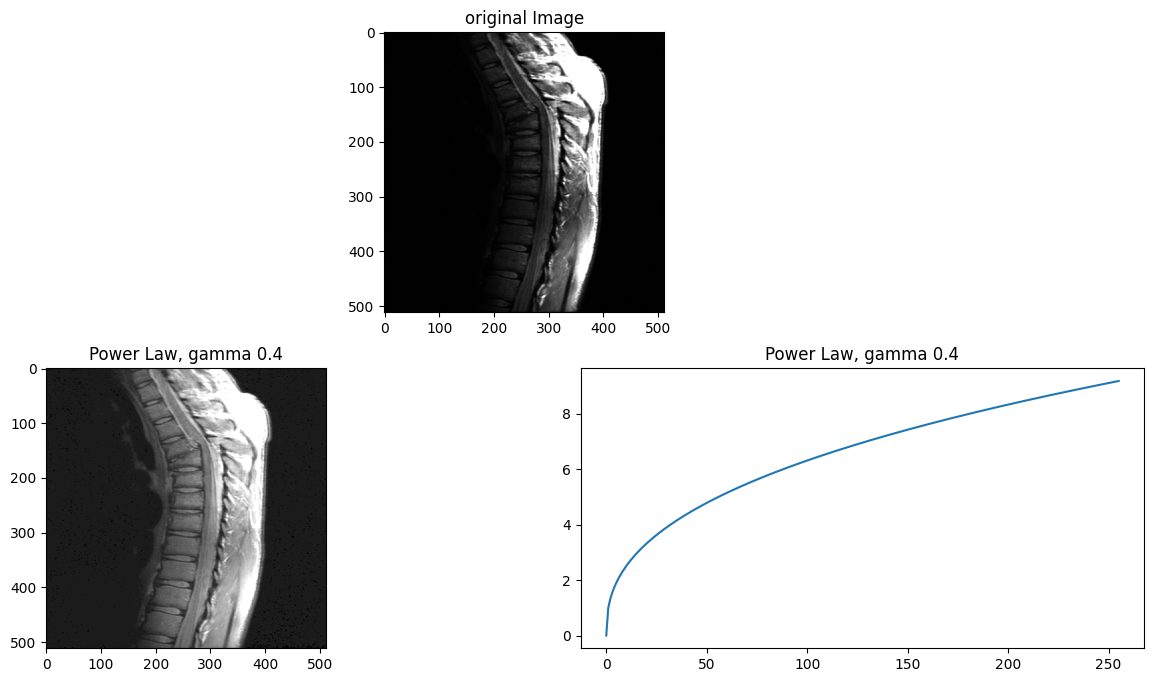

In [37]:
plt.figure(figsize=(16, 8))
plt.subplot(2,2,(1,2))
plt.imshow(grey_image, cmap='gray')
plt.title('original Image')
plt.subplot(2,2,3)
plt.imshow(power_law_transofrmed_image, cmap='gray')
plt.title(f'Power Law, gamma {gamma}')
plt.subplot(2,2,4)
plt.plot(f_range, f_value)
plt.title(f'Power Law, gamma {gamma}')

In [38]:
def inverse_log_transformation(image):
    c = 255/np.log(256)
    p_image = image.copy()
    inverse_transformed_image = np.exp(p_image/c) - 1
    r = np.arange(0, 256)
    y = np.exp(r/c) - 1

    return np.uint8(inverse_transformed_image), r, y

In [39]:
inverse_log_transformed_image, x,  y = inverse_log_transformation(grey_image)

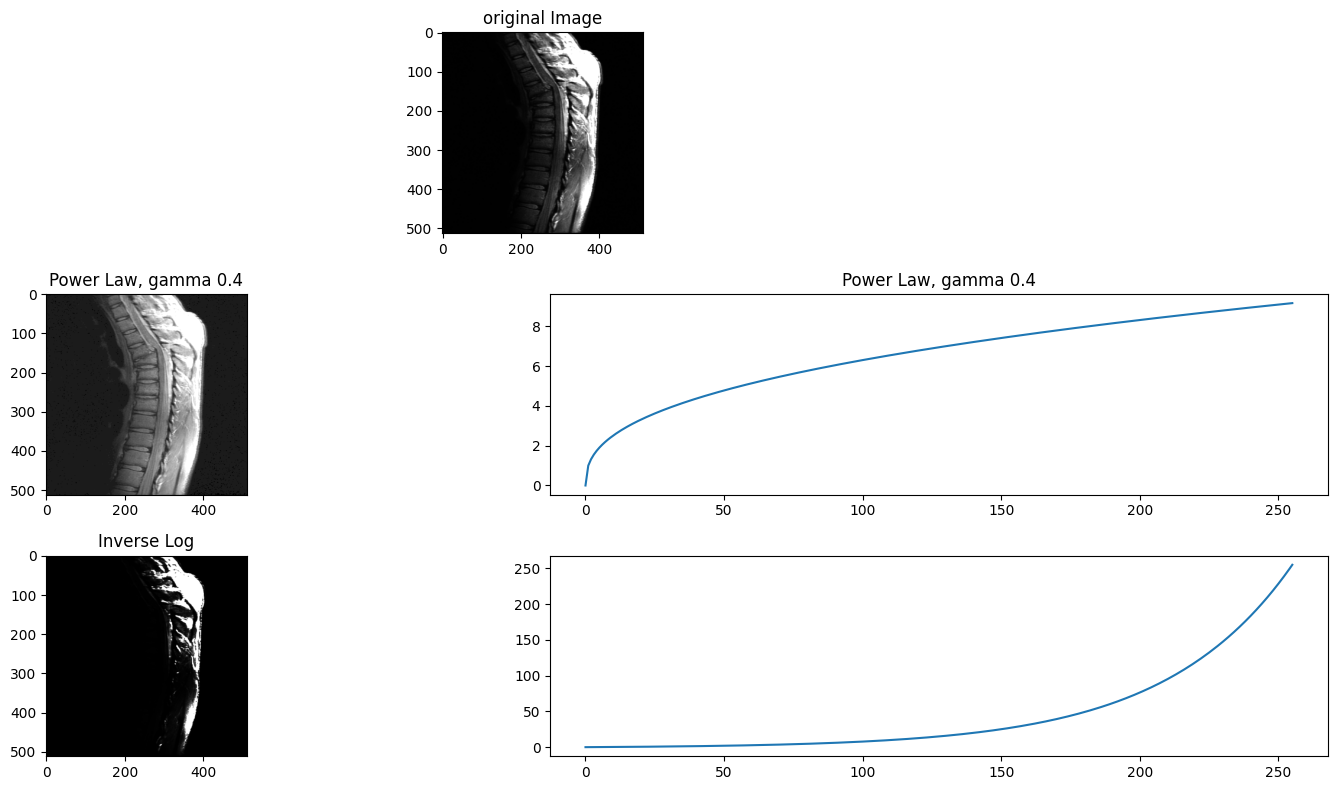

In [40]:
plt.figure(figsize=(16, 8))
plt.subplot(3,2,(1,2))
plt.imshow(grey_image, cmap='gray')
plt.title('original Image')
plt.subplot(3,2,3)
plt.imshow(power_law_transofrmed_image, cmap='gray')
plt.title(f'Power Law, gamma {gamma}')
plt.subplot(3,2,4)
plt.plot(f_range, f_value)
plt.title(f'Power Law, gamma {gamma}')
plt.subplot(3,2,5)
plt.imshow(inverse_log_transformed_image, cmap='gray')
plt.title(f'Inverse Log')
plt.subplot(3,2,6)
plt.plot(x, y)
plt.tight_layout()
plt.show()